In [34]:
# Fill in your name using the format below and student ID number
your_name = "Campitelli, Leonardo"
student_id = "1553429"

In [35]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [36]:
# Uncomment the following line to run in Google Colab
#!pip install --quiet openml 

In [37]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [38]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [39]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Leonardo, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [40]:
#base_dir = '/content/drive/My Drive/assign3' # For Google Colab
base_dir = '/Users/leonardo/Desktop/Courses/dataMining/assign3'

In [41]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [42]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [43]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [44]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [45]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

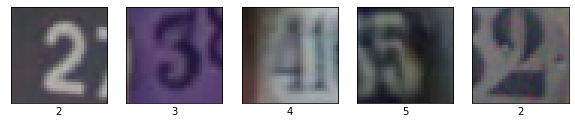

In [46]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [47]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.845359  0.249087  0.8

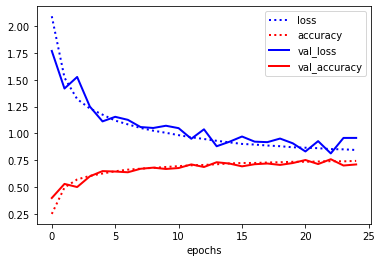

In [48]:
from tensorflow.keras import models
from tensorflow.keras import layers 
def build_model_1_1():
    model = models.Sequential()
    
    #Input Layer
    #model.add(layers.Input(input_shape=(32,32,3)))
    model.add(layers.Flatten(input_shape = (32,32,3)))
    
    #Dense Layers requested
    max_num_nodes = 128 #Layers will have increasingly fewer nodes starting from here
    model.add(layers.Dense(max_num_nodes,   activation='relu')) #, input_shape=(32,32,3)))
    model.add(layers.Dense(int(max_num_nodes/2), activation='relu'))
    model.add(layers.Dense(int(max_num_nodes/4), activation='tanh'))
    #model.add(layers.Dense(max_num_nodes/8, activation='relu'))
    
    #Output Layer
    #model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    #Compiling model
    model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics =['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=25, batch_size=32)
answer_q_1_1 = """Flattening out images provided better results with Dense layers than using images as they are. Among the tests I run, the
best trade off between trainig speed and accuracy scores is achieved using 25 epochs and 128 starting nodes, halving those at each layer to attain
the requested pyramidal shape. Tanh proves to be a better activation function than relu for the last layer. Regularization is needed as the model seems 
to be overfitting."""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [49]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.772542  0.300910  0.8

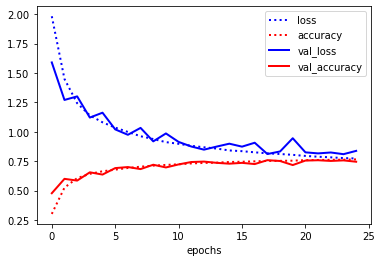

In [50]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val #Corresponds to X_train, X_val, y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    
    #Input Layer
    model.add(layers.Flatten(input_shape=(32,32,1)))
    
    max_num_nodes = 128 
    model.add(layers.Dense(max_num_nodes,   activation='relu'))
    model.add(layers.Dense(max_num_nodes//2, activation='relu'))
    model.add(layers.Dense(max_num_nodes//4, activation='tanh'))
    
    #Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    #Compiling model
    model.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics =['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=25, batch_size=32)
answer_q_1_2 = """Converting all images to grayscale breaks any mistakes made because of colors in images so the model is performing
better than the previous one. Regularization is needed since the accuracy of the model 
remains fixed while loss values increase. This is a sign of overfitting."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 141,866
Trainable params: 141,866
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.764803  0.263581  0.8

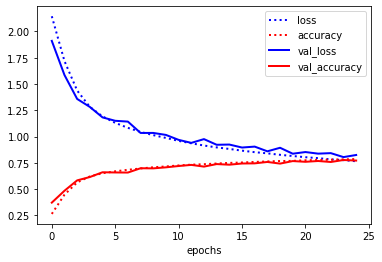

In [51]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

def build_model_1_3():
    model = models.Sequential()
    
    #Input Layer
    model.add(layers.Flatten(input_shape=(32,32,1)))
    
    
    max_num_nodes = 128 
    model.add(layers.Dense(max_num_nodes,   activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    #model.add(layers.Dropout(0.4))
    model.add(layers.Dense(max_num_nodes//2, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(max_num_nodes//4, activation='tanh', kernel_regularizer=regularizers.l2(0.0005)))
    #model.add(layers.Dropout(0.2))
    
    #Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    #Compiling model
    opt = optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=opt,
                 loss='categorical_crossentropy',
                 metrics =['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=25, batch_size=32)
answer_q_1_3 = """L1 regularization alone provides very bad results, with accuracy scores near 20%. I decided to use L2 regularization with some low 
values as stronger regularization yields low scores. Default learning rate was too high for the model to properly train. A lower learning rate
lets the model to better fit the training data. This may make the model overfit so I added regularization to all layers, with different values.
The model overfits less than the previous ones thanks to the added regularization. """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_2 (MaxP

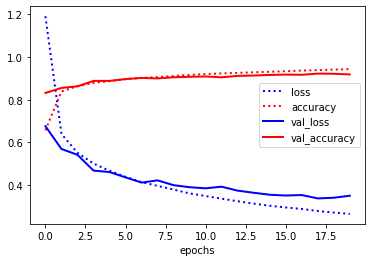

In [52]:
def build_model_2_1():

  model = models.Sequential()

  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1), kernel_regularizer=regularizers.l2(0.003)))
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
  #model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001), name='last_conv_layer'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='tanh'))
  model.add(layers.Dense(10, activation='softmax'))

  opt = optimizers.RMSprop(1e-4)   #default 0.001

  model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=20, batch_size=32)
answer_q_2_1 = """First layer uses 32 filters, with a relu activation function. This first layer provides better results among the tests I run.
After a max Pooling layer with default 2x2 size, images are now 15x15x32 features maps. Filter number is increased to avoid decreasing the number of activations. 
Last Dense layer matches the number of features generated by the convolution, plus the needed 10 nodes output layer. Tanh proved to be a better activation function than 
relu for the last dense layer, providing higher accuracy scores. Almost no overfitting seems to happen with the added Dropout layer and Batch Normalization. 
All convolutional layers use padding to not lose information upon processing the images."""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_5 (MaxP

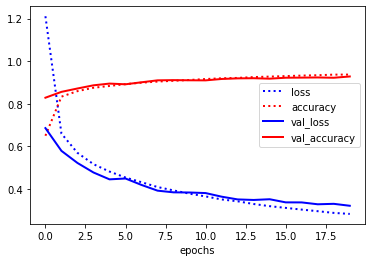

In [53]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

def temp_show_generated(gen, num_of_lines = 2, img_per_line = 6, grayscale=True):
  #Plots some images obtained through the generator, used for testing
  if(img_per_line >= 10):
    img_per_line = 9
  for line in range(num_of_lines):
    i = 0
    for batch in gen:
      plt.subplot( 100 + (img_per_line*10) + (i+1))
      plt.xticks([]) 
      plt.yticks([])
      imgplot = plt.imshow(array_to_img(batch[0][i]), cmap='gray')
      print((np.argmax(batch[1][i])+1)%10, end = ' ')
      i += 1
      if i == img_per_line:
        break
    plt.tight_layout()
    plt.show()
    print()
  return 


train_datagen = ImageDataGenerator(
    #rescale = 1/255,
    #rotation_range = 90,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range = 0.1,  #(0.3)
    zoom_range = 0.1,   #(0.2)
    fill_mode = 'nearest')
    #horizontal_flip = True)
    #vertical_flip = False)

prepro_x_train = preprocessed_split[0]
prepro_y_train = preprocessed_split[2]
prepro_x_val = preprocessed_split[1]
bs = 32 #Batch size to use in the generator and training model

train_generator = train_datagen.flow(prepro_x_train, y_train, batch_size=bs)

#temp_show_generated(train_generator, 1, 5)


spe = int(X_train.shape[0]/bs) #Steps_per_epoch

augmented_split = (train_generator, prepro_x_val, y_val)    #Must be a tuple of (dataGenerator, x_validation, y_validation)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True, epochs=20, batch_size=bs, generator=True, steps_per_epoch=spe)

answer_q_2_2 = """Rotating images too much provide bad results, since some numbers may be confused like 6s and 9s. Same applies for 
vertical flip. The dataset used is quite big, so augmentation may not be helpful.
In fact, during tests, augmenting data did not provide great results and in most cases decreased accuracy scores. 
Best results were obtained with minimal augmentations, zoom_range set to 0.1 and shear_range to 0.1. Increasing these
vaues and using shifts decreased accuracy to about 90%"""

print("Answer is {} characters long".format(len(answer_q_2_2)))


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

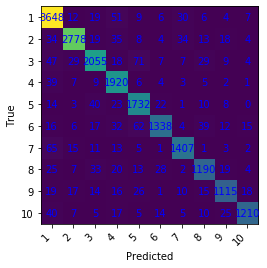

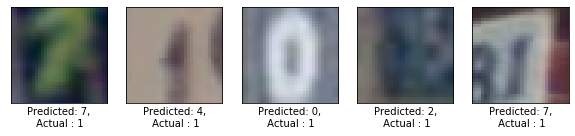

Answer is 741 characters long


In [54]:
from sklearn.metrics import confusion_matrix
m = load_model_from_file(base_dir, 'model_2_2')

test_accuracy_3_1 = m.evaluate(rgb2gray(X_test), y_test, 32, verbose=0)[1]
#print(test_accuracy_3_1)

#y_pred = m.predict(prepro_x_test)

def plot_confusion_matrix():
  y_pred = m.predict(rgb2gray(X_test))
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10'], rotation=45, ha="right")
  ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','10'])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="b")
  plt.show()
  return

def plot_misclassifications():
  cl = 1 #Class to focus on
  num = 5 #number of images to plot
  y_pred = m.predict(rgb2gray(X_test))
  misclassified_samples = np.nonzero((np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1)) & ((np.argmax(y_test, axis=1)+1)%10 == cl))[0]
  start_idx = randint(0, len(misclassified_samples))  #rerun to see more and more misclassified samples
  end_idx = start_idx + num
  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
  for nr, i in enumerate(misclassified_samples[start_idx:end_idx]):
    axes[nr].imshow(X_test[i], cmap='gray')    #We are using preprocessed images, i'll plot images using grayscale
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % ((np.argmax(y_pred[i])+1)%10,(np.argmax(y_test[i])+1)%10))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())
  plt.show()
  return
answer_q_3_1 = """As shown in the confusion matrix, the number 1 is often misclassified. I'll focus on that class for the next part. 
Number 1 may be confused as a 7 or a 4 due to image shearing used during augmentation phase. It's interesting how number 1 is rarely
confused for a 10 rather than other classes. Other numbers seem to be recognized just fine, with little misclassification. Best results are obtained with numbers
7 and 10. As expected, rotated number 1s can be misclassified as 7 or 4 due to their position. There are also some 0s becoming too slim
and thus classified as 1s. Misclassification happens also due to surrounding numbers, when the main number to classify is not fully
centered, probably due to the augmentations used like zooming."""

plot_confusion_matrix()
plot_misclassifications()


print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
last_conv_layer (Conv2D)     (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

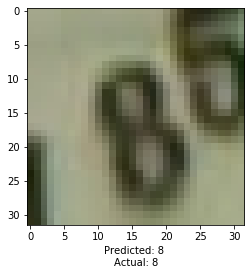

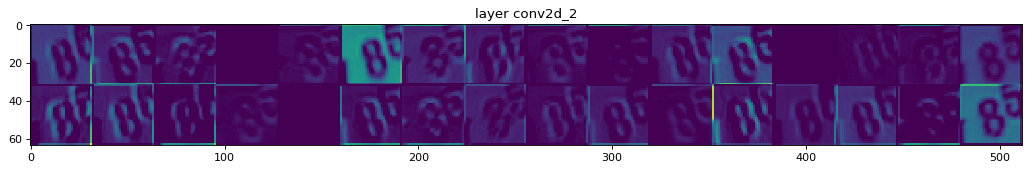

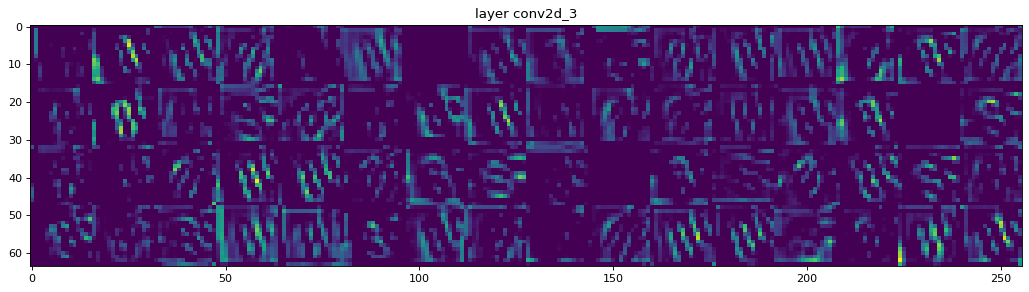

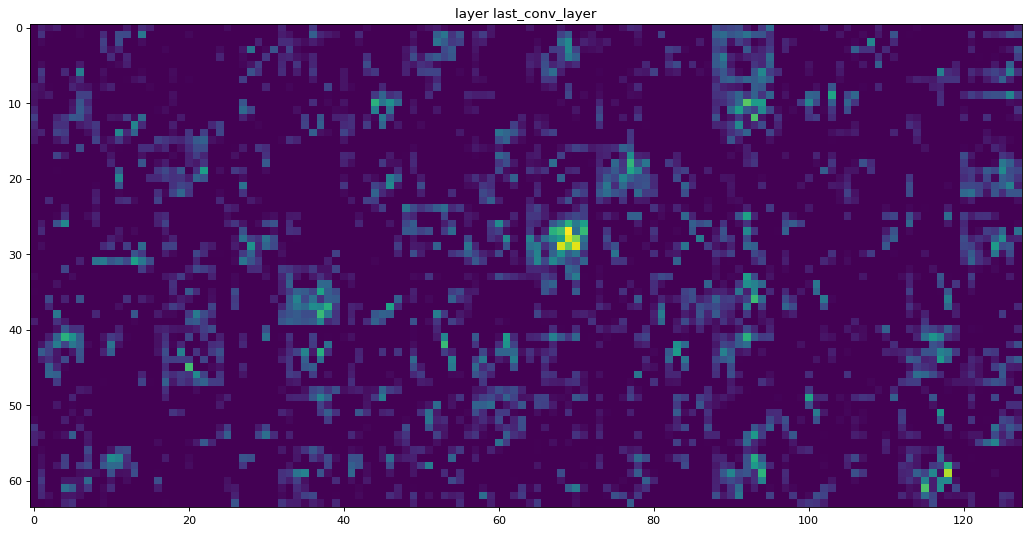

Answer is 488 characters long


In [55]:
def plot_activations():
  #Reminder of the model used
  model = load_model_from_file(base_dir, 'model_2_2')
  model.summary()
  idx = 0 #Image to use for activation analysis

  y_pred = m.predict(rgb2gray(X_test))

  img = X_test[idx] #Test img
  img_label = y_test[idx]

  #Plot test image that will be used
  fig, ax = plt.subplots(1,1)
  plt.imshow(img)
  ax.set_xlabel('Predicted: {} \nActual: {}'.format((np.argmax(y_pred[idx])+1)%10, (np.argmax(y_test[idx])+1)%10)) # Label is index+1

  #Model trained over grayscale images, taking the preprocessed image
  img = rgb2gray(X_test)[idx]
  img = np.expand_dims(img, axis=0)

  #Retrieving layer outputs and activations, leaving out last dense layers
  #Will only take Conv2D layers, positions 0,2,4
  layer_outputs = [layer.output for layer in model.layers[:7] if isinstance(layer, layers.Conv2D)]
    
    #This is where verify.py fails
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

  activations = activation_model.predict(img)
  names = [l.name for l in model.layers[:7] if isinstance(l, layers.Conv2D)]

  #plotting activations, 16 images per row
  l = 0
  for act in activations:
    features = act.shape[-1] 
    n_cols = int(features / 16)
    size = act.shape[1]
    grid = np.zeros((size * n_cols, 16 * size)) #each row is as big as the image (with their resolution). same with columns

    #Fills the grid
    for col in range(n_cols):
            for row in range(16):
                channel_image = act[0, :, :, col * 16 + row]
                grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.rcParams['figure.dpi'] = 80
    plt.figure(figsize=(scale * grid.shape[1], scale * grid.shape[0]))
    plt.title("layer {}".format(names[l]))
    plt.grid(False)
    plt.imshow(grid, aspect='auto', cmap='viridis')
    l+= 1

  plt.show()
  return
answer_q_3_2 = """Filters in the first convolutional layer seems to notice more edges and round shapes when analyzing a round number such as 8. 
There are some activations totally unresponsive which may be used to recognized more rigid-shaped numbers as 1s or 7s. Some filters seems
to focus on the space around the number itself. For the second layer, filters seems to focus more on round shapes inside the number itself and round borders. 
Last layer focuses on totally abstract patterns quite hard to see"""
plot_activations()
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

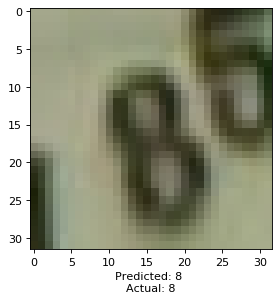

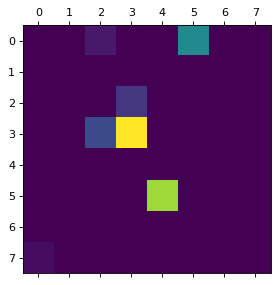

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


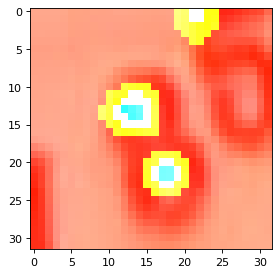

In [56]:
from tensorflow.keras import backend as K
import cv2

def plot_3_3():
  model = load_model_from_file(base_dir, 'model_2_2')
  #model.summary()
  idx = 0 #Image to use for activation analysis

  y_pred = m.predict(rgb2gray(X_test))

  img = X_test[idx] #Test img
  img_label = y_test[idx]

  #Plot test image that will be used
  fig, ax = plt.subplots(1,1)
  plt.imshow(img)
  ax.set_xlabel('Predicted: {} \nActual: {}'.format((np.argmax(y_pred[idx])+1)%10, (np.argmax(y_test[idx])+1)%10)) # Label is index+1

  #Model trained over grayscale images, taking the preprocessed image
  img = rgb2gray(X_test)[idx]
  img = np.expand_dims(img, axis=0)

  #Computing heatmap
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('last_conv_layer')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(img)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((8, 8))
  plt.matshow(heatmap)
  plt.show()

  img = X_test[idx] #Reload test image
  
  heatmap = cv2.resize(heatmap, (img.shape[0], img.shape[1]))

  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    
  intensity = 0.4
  img = heatmap * intensity + img
    
  plt.imshow(img)
    
  return

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
None
     val_loss   val_acc      loss       acc
min  0.705630  0.677409  0.579926  0.572816
max  0.968242  0.802795  1.291297  0.823335
Answer is 411 characters long


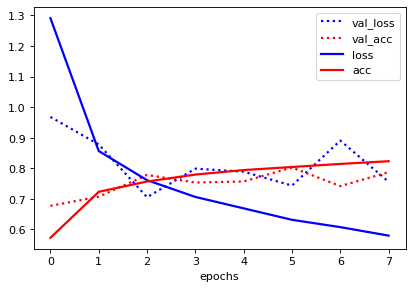

In [57]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  m = models.Sequential()
  conv_base = VGG16(weights = 'imagenet', include_top=False, input_shape=(32,32,3))

  for l in conv_base.layers[:15]: #Setting all layers but the last 3 convs to non trainable, will set the last 3 layers separately
    l.trainable = False
  
  conv_base.get_layer('block5_conv1').trainable = True
  conv_base.get_layer('block5_conv2').trainable = True 
  conv_base.get_layer('block5_conv3').trainable = True

  m.add(conv_base)
  m.add(layers.Flatten())
  m.add(layers.Dense(512, activation = 'relu', input_shape = (1,1,512)))
  #m.add(layers.Dropout(0.5))
  m.add(layers.Dense(10, activation = 'softmax'))

  opt = optimizers.RMSprop(lr=0.001)

  m.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['acc'])
  
  return m

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=8, batch_size=64)
answer_q_4_1 = """Freezing the whole network did not provide great results, with accuracy scores near 50%. Training with just the 
last layer unfrozen makes the model overfit quite a lot on the given training set. Accuracy improves when all last convolutional
layers are trained along the dense layers, reaching about 80%, however the model starts to heavily overfit around the 10th epoch, so
training has to end before that point"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [58]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer, PowerTransformer
from sklearn.metrics import accuracy_score

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, 'model_4_1')
  conv_base = model.get_layer('vgg16')  #Output size 1x1x512
  try:
    load_embedding('train')
    shout('Training set embeddings loaded')
  except FileNotFoundError:
    train_emb = conv_base.predict(X_train)  # creates 63544 filters 1 x 1 x 512
    train_emb = np.reshape(train_emb, (63544, 512))
    store_embedding(train_emb, 'train')
    shout('Training set embeddings created')
  
  try:
    load_embedding('test')
    shout('Test set embeddings loaded')
  except FileNotFoundError:
    test_emb = conv_base.predict(X_test)    #creates 19858 filters 1 x 1 x 512
    test_emb = np.reshape(test_emb, (19858, 512))
    store_embedding(test_emb, 'test')
    shout('Test set embeddings created')
  return

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  #I'll use SVM
  #classifier = SVC(C = 10, kernel = 'rbf')
  classifier = RandomForestClassifier(n_estimators=150)
  norm = Normalizer()
  return Pipeline(steps = [('Normalizer', norm),('classifier', classifier)])

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  #Here X_train and X_test are already in embedding form.
  pipeline.fit(X_train, y_train)
  return accuracy_score(y_test, pipeline.predict(X_test))

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  #Checks for embeddings, creates them if they are not present
  store_embeddings()
  #Here Embeddings either were already created or have just been
  train_emb = load_embedding('train')
  test_emb = load_embedding('test')
  #Transforming labels
  train_labels = [(np.argmax(i) +1) %10 for i in y_train]
  test_labels = [(np.argmax(i) +1) %10 for i in y_test]
  return evaluate_pipeline(generate_pipeline(), train_emb, train_labels, test_emb, test_labels)

answer_q_4_2 = """Using a Support Vector Machine, training takes quite some time. RandomForest proves to be
much quicker in both training and evaluation. Testing multiple preprocessing 
techniques, I got the best accuracy scores using a normalizer over the embeddings and then using a RFC with 150 estimators.
This setup yields accuracy around 81%, still not as good as the convolutional neural network. Overall low scores with VGG16 may be because that 
net is trained over animal images instead of numbers."""

accur_4_2 = evaluation_4_2(X_train, y_train, X_test, y_test)
#print(accur_4_2)
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Training set embeddings loaded
Test set embeddings loaded
Pipeline: Pipeline(memory=None,
         steps=[('Normalizer', Normalizer(copy=True, norm='l2')),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
       